In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [407]:
df = pd.read_csv("advertising.csv")
print(df.shape)

(200, 4)


In [408]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [409]:
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

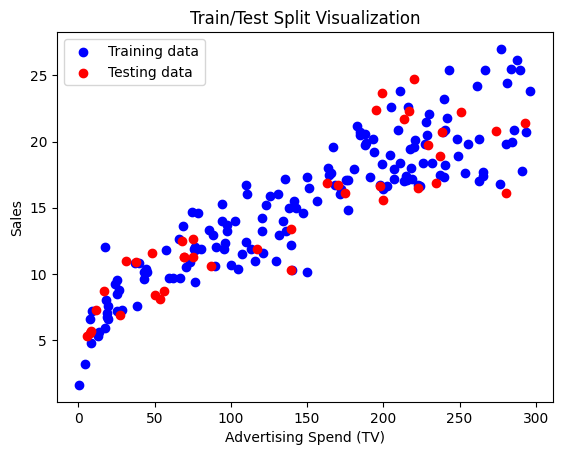

In [410]:
# Ploting the training and testing data
plt.scatter(X_train, y_train, label='Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')
plt.legend()
plt.xlabel("Advertising Spend (TV)")
plt.ylabel("Sales")
plt.title("Train/Test Split Visualization")
plt.show()

## First I will find the exact solution using OLS Method  

In [411]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)

y_pred = lr.predict(X_test)


r2_score(y_test, y_pred)

7.007108428241848
[0.05548294]


0.802561303423698

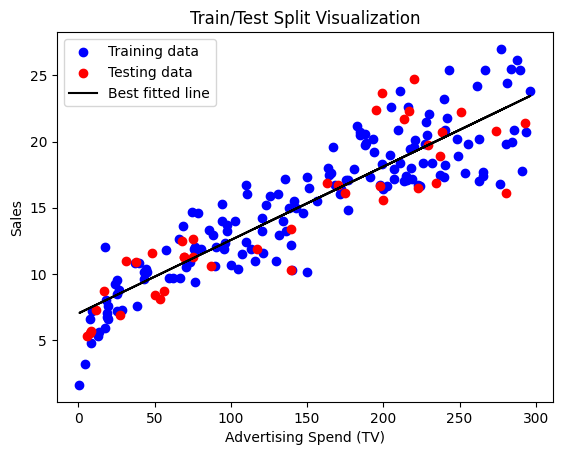

In [412]:
# Ploting the best fitted line
plt.scatter(X_train, y_train, label='Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')
plt.plot(X_train, lr.predict(X_train), label='Best fitted line', color='black')
plt.legend()
plt.xlabel("Advertising Spend (TV)")
plt.ylabel("Sales")
plt.title("Train/Test Split Visualization")
plt.show()

## Finding solution using Batch Gradient Descent (BGD)

In [413]:
# Lets create our own Batch Gradient Descent Class
class BatchGradientDescent:

    def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.intercept_ = None
        self.coef_ = None
        self.history_ = []

    def fit(self, X_train, y_train):   
        # Initializaing intercept_ and coef_
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # Updating coef_ and intercept_
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            intercept_der = -2 * np.mean(y_train - y_hat) 
            self.intercept_ -= self.learning_rate * intercept_der

            coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]
            self.coef_ -= self.learning_rate * coef_der

            self.history_.append((self.intercept_, self.coef_.copy()))

        print("Intercept:", self.intercept_)
        print("Coefficient(s):", self.coef_)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [414]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Intercept: 15.330624999999994
Coefficient(s): [4.66914684]


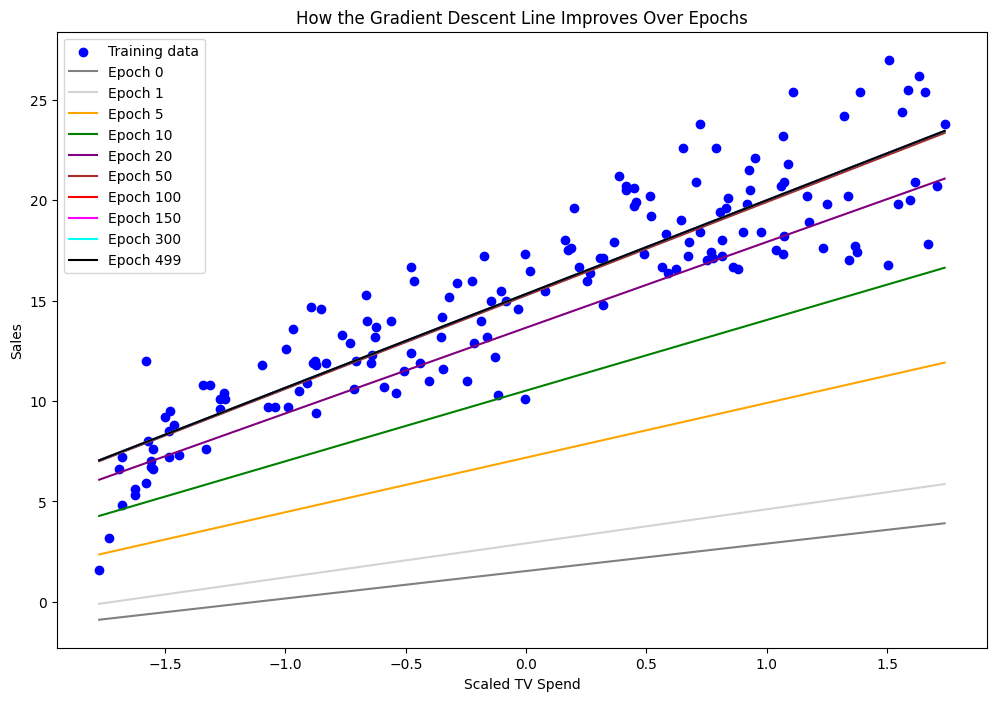

In [415]:
# Train the model for more epochs
bgd = BatchGradientDescent(epochs=500, learning_rate=0.05)
bgd.fit(X_train_scaled, y_train)

plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled, y_train, color='blue', label='Training data')

# Choose many epochs to see smoother changes
epochs_to_show = [0, 1, 5, 10, 20, 50, 100, 150, 300, 499]
colors = ['gray', 'lightgray', 'orange', 'green', 'purple', 'brown', 'red', 'magenta', 'cyan', 'black']

# Make X values to draw prediction lines
x_vals = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)

# Draw lines from multiple epochs to show progress
for epoch, color in zip(epochs_to_show, colors):
    b, m = bgd.history_[epoch]        
    y_vals = b + m[0] * x_vals       
    plt.plot(x_vals, y_vals, color=color, label=f'Epoch {epoch}')

plt.xlabel("Scaled TV Spend")
plt.ylabel("Sales")
plt.title("How the Gradient Descent Line Improves Over Epochs")
plt.legend()
plt.show()

In [416]:
# Original paratemerts 
coef_original = bgd.coef_[0] / scaler.scale_[0]
intercept_original = bgd.intercept_ - (bgd.coef_[0] * scaler.mean_[0] / scaler.scale_[0])
print("Intercept Original: ", intercept_original)
print("Coefficient Original:", coef_original)

Intercept Original:  7.007108428241853
Coefficient Original: 0.05548294393146312


In [417]:
y_pred = bgd.predict(X_test_scaled)
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [418]:
r2_score(y_test, y_pred)

0.8025613034236981